In [ ]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

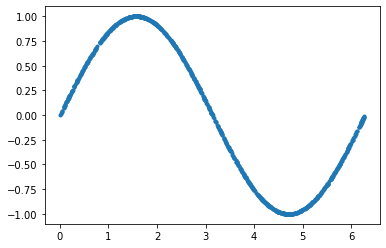

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], '.')

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size, shuffle=True)

In [ ]:
train_set

[(tensor([0.3957, 0.3854]), tensor(0.)),
 (tensor([1.3985, 0.9852]), tensor(0.)),
 (tensor([2.6612, 0.4621]), tensor(0.)),
 (tensor([2.3004, 0.7454]), tensor(0.)),
 (tensor([1.3416, 0.9738]), tensor(0.)),
 (tensor([1.9308, 0.9359]), tensor(0.)),
 (tensor([ 4.9182, -0.9789]), tensor(0.)),
 (tensor([2.6246, 0.4942]), tensor(0.)),
 (tensor([ 5.6746, -0.5717]), tensor(0.)),
 (tensor([2.3044, 0.7427]), tensor(0.)),
 (tensor([ 3.2807, -0.1387]), tensor(0.)),
 (tensor([0.9683, 0.8239]), tensor(0.)),
 (tensor([ 3.4096, -0.2648]), tensor(0.)),
 (tensor([1.3937, 0.9844]), tensor(0.)),
 (tensor([ 5.2512, -0.8583]), tensor(0.)),
 (tensor([ 4.7980, -0.9963]), tensor(0.)),
 (tensor([ 4.4383, -0.9627]), tensor(0.)),
 (tensor([ 3.2909, -0.1487]), tensor(0.)),
 (tensor([ 4.6816, -0.9995]), tensor(0.)),
 (tensor([1.0596, 0.8721]), tensor(0.)),
 (tensor([ 4.2438, -0.8922]), tensor(0.)),
 (tensor([0.1392, 0.1388]), tensor(0.)),
 (tensor([ 4.6715, -0.9992]), tensor(0.)),
 (tensor([ 3.6765, -0.5097]), tenso

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
            )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [ ]:
D_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
G_optimizer = optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Данные для обучения дискриминатора
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Обучение дискриминатора
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        D_optimizer.step()

        # Данные для обучения генератора
        latent_space_samples = torch.randn((batch_size, 2))

        # Обучение генератора
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        G_optimizer.step()

        # Выводим значения функций потерь
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")


Epoch: 0 Loss D.: 0.31247493624687195
Epoch: 0 Loss G.: 2.2037274837493896
Epoch: 10 Loss D.: 0.6964033842086792
Epoch: 10 Loss G.: 0.7645925879478455
Epoch: 20 Loss D.: 0.6905531287193298
Epoch: 20 Loss G.: 0.7474135756492615
Epoch: 30 Loss D.: 0.684369683265686
Epoch: 30 Loss G.: 0.7918732762336731
Epoch: 40 Loss D.: 0.6480380296707153
Epoch: 40 Loss G.: 0.85405033826828
Epoch: 50 Loss D.: 0.7913207411766052
Epoch: 50 Loss G.: 0.7245906591415405
Epoch: 60 Loss D.: 0.6991065144538879
Epoch: 60 Loss G.: 0.6136032342910767
Epoch: 70 Loss D.: 0.7036746144294739
Epoch: 70 Loss G.: 0.656572163105011
Epoch: 80 Loss D.: 0.6786162853240967
Epoch: 80 Loss G.: 0.725326657295227
Epoch: 90 Loss D.: 0.6875694394111633
Epoch: 90 Loss G.: 0.7069343328475952
Epoch: 100 Loss D.: 0.6968794465065002
Epoch: 100 Loss G.: 0.7379682660102844
Epoch: 110 Loss D.: 0.669329822063446
Epoch: 110 Loss G.: 0.763390839099884
Epoch: 120 Loss D.: 0.6350194811820984
Epoch: 120 Loss G.: 0.8700197339057922
Epoch: 130 Los

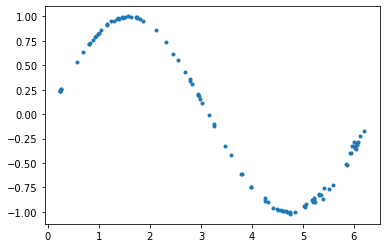

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")